In [1]:
#Para esta ocasion usare el dataset descargado de Kaggle
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

#Ruta del archivo csv
ruta = '/content/drive/MyDrive/IA /ProyectoAA/vgchartz-2024.csv'

df = pd.read_csv(ruta)
df.head()

img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal_sales  other_sales release_date last_update  
0      6.37      0.99       9.85         3.12   2013-09-17         NaN  
1      6.06      0.60       9.71         3.02   2014-11-18  2018-01-03  
2      8.41      0.47       5.49         1.78   2002-10-28         NaN  
3      9.06      0.06       5.33         1.42   2013-09-17         NaN  
4      6.18      0.41       6.05         2.44   2015-11-06  2018-01-14

El DataFrame tiene un total de 64,016 filas y 14 columnas.

Las columnas representan diferentes atributos de los videojuegos, como la imagen del juego (`img`), título (`title`), consola (`console`), género (`genre`), editor (`publisher`), desarrollador (`developer`), puntuación de críticos (`critic_score`), ventas totales (`total_sales`) y ventas en regiones específicas como América del Norte (`na_sales`), Japón (`jp_sales`), Europa/PAL (`pal_sales`), y otras regiones (`other_sales`), además de las fechas de lanzamiento (`release_date`) y última actualización (`last_update`).

El tipo de datos de las columnas incluye objetos (strings) para algunas características como título, consola, género, etc., y números flotantes para las variables numéricas como puntuación de críticos y ventas.

Se observa que algunas columnas tienen valores nulos, como `critic_score`, `total_sales`, `na_sales`, `jp_sales`, `pal_sales`, `other_sales`, `release_date` y `last_update`. Esto sugiere que no todos los juegos tienen información disponible para todas las variables, lo que puede requerir manejo de datos faltantes durante el análisis.


In [52]:
print("Número de filas y columnas del DataFrame:", df.shape)
print("\n")
df.info()
print("\n")
df.describe().T


Número de filas y columnas del DataFrame: (64016, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB




count      mean       std  min   25%   50%   75%    max
critic_score   6678.0  7.220440  1.457066  1.0  6.40  7.50  8.30  10.00
total_sales   18922.0  0.349113  0.807462  0.0  0.03  0.12  0.34  20.32
na_sales      12637.0  0.264740  0.494787  0.0  0.05  0.12  0.28   9.76
jp_sales       6726.0  0.102281  0.168811  0.0  0.02  0.04  0.12   2.13
pal_sales     12824.0  0.149472  0.392653  0.0  0.01  0.04  0.14   9.85
other_sales   15128.0  0.043041  0.126643  0.0  0.00  0.01  0.03   3.12

Estadísticas descriptivas de algunas variables numéricas:

- **Puntuación de Críticos (`critic_score`)**:
  - Count: 6,678
  - Media (Mean): 7.22
  - Desviación Estándar (Std): 1.46
  - Valor Mínimo (Min): 1.00
  - Percentil 25%: 6.40
  - Mediana (Percentil 50%): 7.50
  - Percentil 75%: 8.30
  - Valor Máximo (Max): 10.00

- **Ventas Totales (`total_sales`)**:
  - Count: 18,922
  - Media (Mean): 0.35
  - Desviación Estándar (Std): 0.81
  - Valor Mínimo (Min): 0.00
  - Percentil 25%: 0.03
  - Mediana (Percentil 50%): 0.12
  - Percentil 75%: 0.34
  - Valor Máximo (Max): 20.32

- **Ventas en América del Norte (`na_sales`)**:
  - Count: 12,637
  - Media (Mean): 0.26
  - Desviación Estándar (Std): 0.49
  - Valor Mínimo (Min): 0.00
  - Percentil 25%: 0.05
  - Mediana (Percentil 50%): 0.12
  - Percentil 75%: 0.28
  - Valor Máximo (Max): 9.76

- **Ventas en Japón (`jp_sales`)**:
  - Count: 6,726
  - Media (Mean): 0.10
  - Desviación Estándar (Std): 0.17
  - Valor Mínimo (Min): 0.00
  - Percentil 25%: 0.02
  - Mediana (Percentil 50%): 0.04
  - Percentil 75%: 0.12
  - Valor Máximo (Max): 2.13

- **Ventas en Europa/PAL (`pal_sales`)**:
  - Count: 12,824
  - Media (Mean): 0.15
  - Desviación Estándar (Std): 0.39
  - Valor Mínimo (Min): 0.00
  - Percentil 25%: 0.01
  - Mediana (Percentil 50%): 0.04
  - Percentil 75%: 0.14
  - Valor Máximo (Max): 9.85

- **Otras Ventas (`other_sales`)**:
  - Count: 15,128
  - Media (Mean): 0.04
  - Desviación Estándar (Std): 0.13
  - Valor Mínimo (Min): 0.00
  - Percentil 25%: 0.00
  - Mediana (Percentil 50%): 0.01
  - Percentil 75%: 0.03
  - Valor Máximo (Max): 3.12

Estas estadísticas proporcionan información sobre la distribución y dispersión de los datos en las variables numéricas, lo que puede ayudar a comprender mejor las características del conjunto de datos y su variabilidad.


In [4]:
print("El recuento de valores nulos por columna en el DataFrame es el siguiente:")
df.isna().sum()

El recuento de valores nulos por columna en el DataFrame es el siguiente:


img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

1. **Juegos Más Vendidos:**
   - Identificar los 10 juegos más vendidos y sus plataformas populares.
2. **Rendimiento por Género:**
   - Explorar los géneros con las puntuaciones críticas y ventas más altas.
   - Analizar las ventas totales por género.
3. **Influencia de los Editores:**
   - Examinar los editores con más lanzamientos y su desempeño en ventas.
   - Comparar las ventas entre diferentes editores.
4. **Preferencias Regionales:**
   - Analizar las preferencias de género en diferentes regiones.
   - Examinar la distribución de ventas en América del Norte, Japón y regiones PAL.
5. **Ciclo de Vida de la Plataforma:**
   - Comparar las tendencias de ventas entre plataformas más antiguas y más nuevas.
   - Identificar las plataformas con las ventas promedio más altas por juego.
6. **Impacto de la Fecha de Lanzamiento:**
   - Explorar la correlación entre las fechas de lanzamiento y el desempeño en ventas.
7. **Influencia de los Desarrolladores:**
   - Examinar la influencia de los desarrolladores en las puntuaciones críticas y las ventas.
8. **Longevidad de las Ventas:**
   - Identificar juegos con ventas sostenidas a largo plazo.
   - Explorar los factores que contribuyen a su éxito.
9. **Efecto de la Crítica:**
   - Explorar el impacto de las reseñas críticas en el desempeño del juego.


# **1.1 Juegos mas vendidos**

En este gráfico de barras, se visualizan las ventas totales en millones para los diez juegos más vendidos. Cada barra representa un juego específico, y la altura de la barra indica el total de ventas en millones para ese juego. Las barras están etiquetadas con el título del juego en el eje x.

El eje y representa las ventas totales en millones, mientras que el eje x muestra el título del juego. Las etiquetas en el eje x están rotadas 45 grados para facilitar la legibilidad. No hay una leyenda en el gráfico, ya que el color de las barras no tiene relevancia significativa en este caso.

El título del gráfico es "Top 10 Juegos Más Vendidos", lo que indica claramente el contenido del gráfico y su propósito.


<ipython-input-10-c59be472351b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


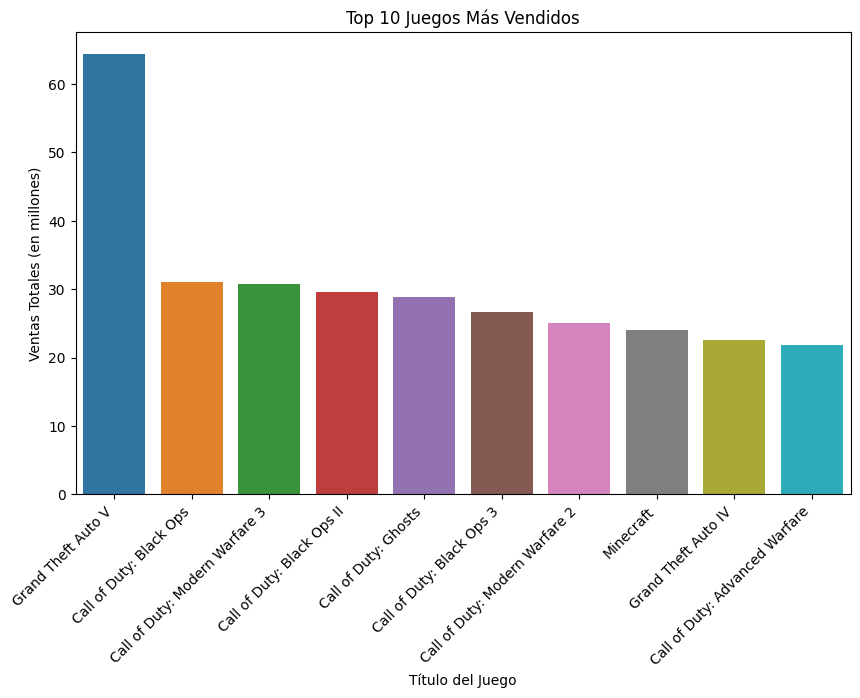

In [10]:
top_selling_games=df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_selling_games.index, y=top_selling_games.values, hue=top_selling_games.index, legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Ventas Totales (en millones)')
ax.set_xlabel('Título del Juego')
ax.set_title('Top 10 Juegos Más Vendidos')
plt.show()

# **1.2 Juegos mas vendidos por plataforma**

En este código se genera un gráfico de barras que muestra las ventas en millones para los juegos más vendidos, organizados por plataforma de juego. A continuación, se explica el proceso:

- **Títulos de los juegos**: Se obtienen los títulos de los juegos del índice del DataFrame.
- **Consolas**: Se obtienen las consolas correspondientes a cada juego del índice del DataFrame.
- **Ventas**: Se obtienen las ventas de cada juego del DataFrame.
- **Consolas únicas**: Se identifican las consolas únicas presentes en el conjunto de datos.
- **Colores para cada consola**: Se asignan colores a cada consola utilizando la paleta de colores 'tab20' de Matplotlib.
- **Convertir ventas a millones**: Las ventas se mantienen en millones para mantener la escala adecuada.
- **Gráfico de barras**: Se itera sobre cada juego y se grafica una barra correspondiente a sus ventas en el gráfico. Cada barra se colorea según la consola a la que pertenece el juego.
- **Etiquetas y título**: Se añaden etiquetas a los ejes x e y, así como un título al gráfico.
- **Formato de etiquetas en el eje y**: Se formatean las etiquetas del eje y para que incluyan la unidad "Millones".
- **Leyenda**: Se añade una leyenda que indica qué color representa a cada consola.

El gráfico resultante muestra claramente las ventas en millones para cada juego, agrupadas por plataforma de juego, facilitando la comparación entre diferentes juegos y plataformas.

In [11]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)

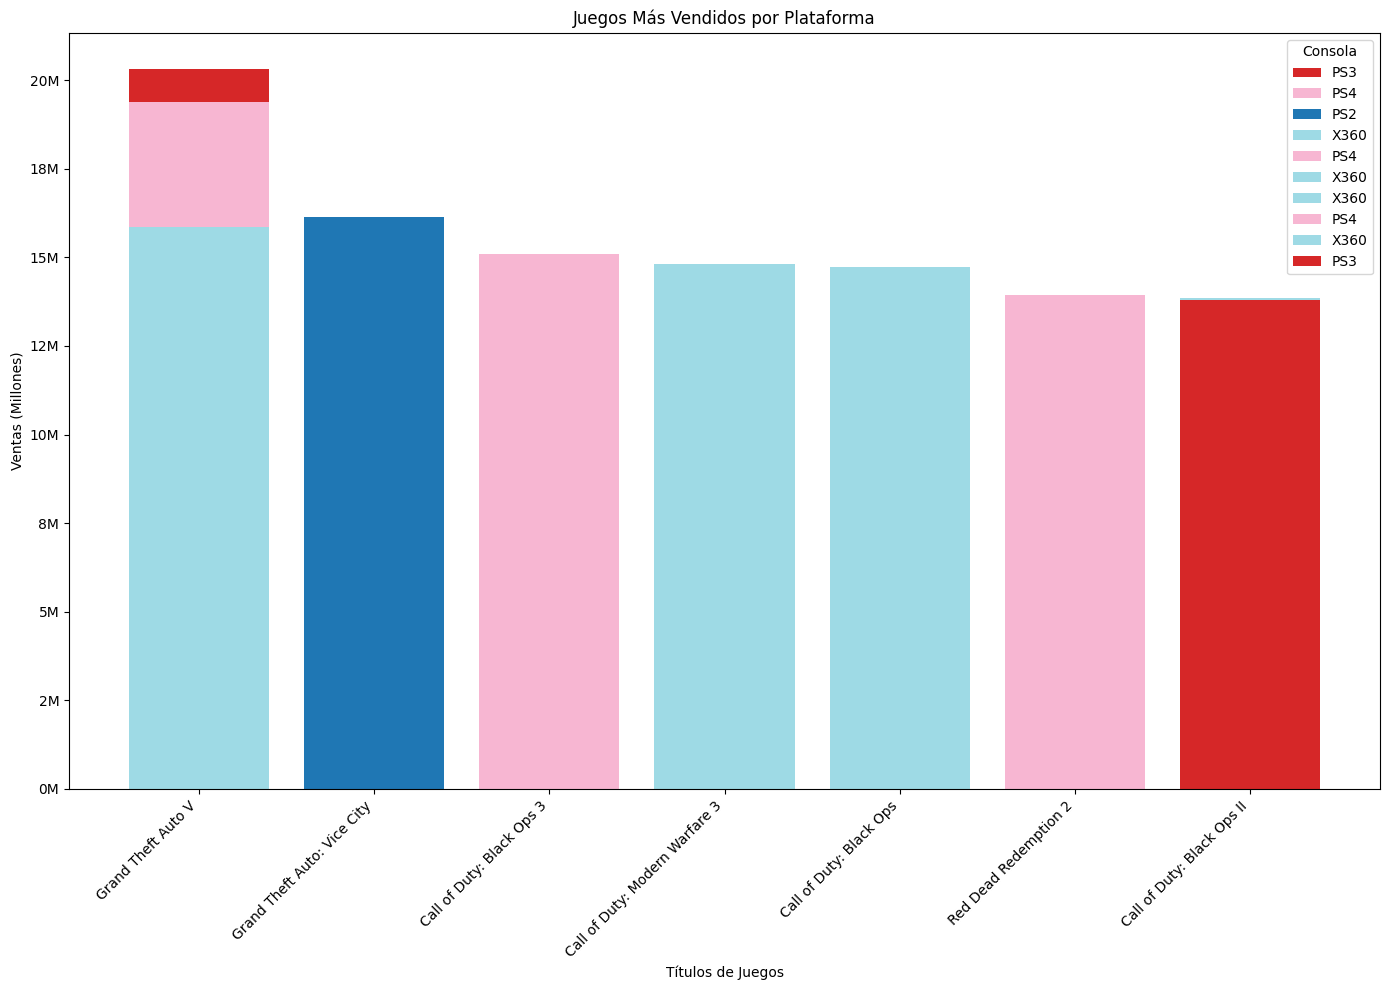

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Títulos de los juegos
titles = [index[0] for index in platforms.index]

# Consolas
consoles = [index[1] for index in platforms.index]

# Ventas
sales = platforms.values

# Consolas únicas
unique_consoles = np.unique(consoles)

# Colores para cada consola
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convertir ventas a millones
ventas_en_millones = sales  # dividir por 1 millón para obtener los valores en millones
#sales_in_millions = sales / 1e6  # dividir por 1 millón para obtener los valores en millones

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], ventas_en_millones[i], color=color, label=console)

plt.xlabel('Títulos de Juegos')
plt.ylabel('Ventas (Millones)')
plt.title('Juegos Más Vendidos por Plataforma')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Consola', loc='best')

# Añadir "Millones" a las etiquetas del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()


# **2. Generos con la mayor puntuacion en criticas y ventas**
En este código, se realizan dos análisis sobre los géneros de los videojuegos presentes en el conjunto de datos:

1. **Análisis de Puntuación del Crítico**:
   - Se agrupa el DataFrame por género y se calcula la mediana de la puntuación del crítico y la suma de las ventas totales para cada género.
   - Los géneros se ordenan por la mediana de la puntuación del crítico de manera descendente.
   - Se utiliza una paleta de colores basada en la cantidad de géneros ordenados por la puntuación del crítico.
   - Se genera un gráfico de barras donde cada barra representa un género y su altura corresponde a la mediana de la puntuación del crítico.
   - Las barras están etiquetadas con la mediana de la puntuación del crítico.

2. **Análisis de Ventas Totales**:
   - Se ordenan los géneros por la suma de las ventas totales de manera descendente.
   - Se utiliza la misma paleta de colores que en el análisis anterior.
   - Se genera un segundo gráfico de barras donde cada barra representa un género y su altura corresponde a las ventas totales acumuladas.
   - Las barras están etiquetadas con el valor de las ventas totales.

Ambos gráficos proporcionan información valiosa sobre la popularidad y recepción crítica de los diferentes géneros de videojuegos.


<ipython-input-13-6156df64dc81>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_genres_by_score.index, y=sorted_genres_by_score['critic_score'], palette=palette)


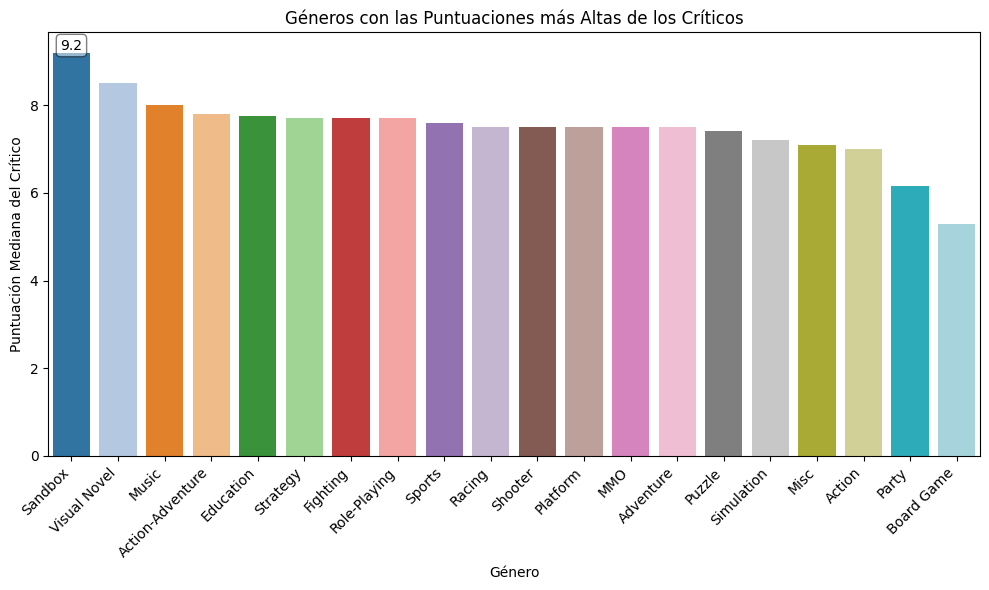

<ipython-input-13-6156df64dc81>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'], palette=palette)


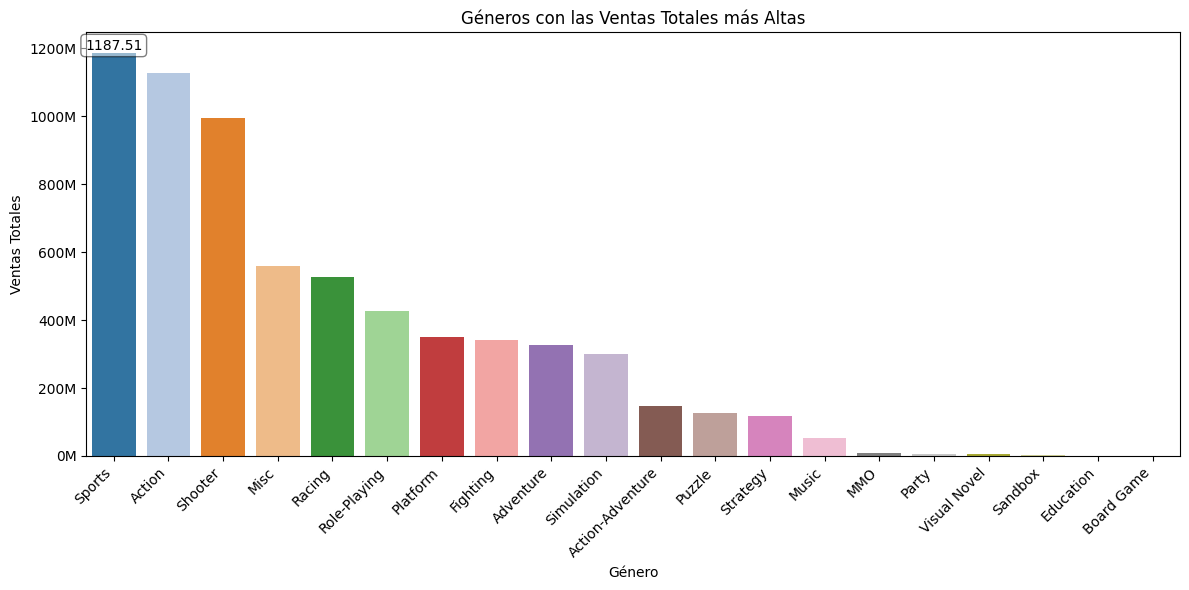

In [13]:
# Agrupar por género y calcular la mediana de la puntuación del crítico y la suma de las ventas totales por género
genre_stats = df.groupby('genre').agg({
    'critic_score': 'median',
    'total_sales': 'sum'
})

# Ordenar los géneros por puntuación del crítico y ventas totales
sorted_genres_by_score = genre_stats.sort_values(by='critic_score', ascending=False)
sorted_genres_by_sales = genre_stats.sort_values(by='total_sales', ascending=False)

# Paleta de colores basada en la cantidad de géneros ordenados por puntuación del crítico
palette = sns.color_palette("tab20", len(sorted_genres_by_score))

# Gráfico de barras para los géneros con las puntuaciones más altas de los críticos
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_genres_by_score.index, y=sorted_genres_by_score['critic_score'], palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black',
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.title('Géneros con las Puntuaciones más Altas de los Críticos')
plt.xlabel('Género')
plt.ylabel('Puntuación Mediana del Crítico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras para los géneros con las ventas totales más altas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'], palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black',
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('Géneros con las Ventas Totales más Altas')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **3.1 Editores con más lanzamientos y su desempeño en ventas**
En este código, se realiza un análisis sobre los editores de videojuegos presentes en el conjunto de datos:

1. **Número de Lanzamientos por Editor**:
   - Se agrupa el DataFrame por editor y se calcula el número de lanzamientos y la suma de ventas totales para cada editor.
   - Los editores se ordenan por el número de lanzamientos de manera descendente.
   - Se utiliza una paleta de colores basada en la cantidad de editores.
   - Se genera un gráfico de barras donde cada barra representa un editor y su longitud corresponde al número de lanzamientos.
   - Las barras están etiquetadas con el número de lanzamientos.

2. **Desempeño de Ventas Totales por Editor**:
   - Se ordenan los editores por la suma de las ventas totales de manera descendente.
   - Se utiliza la misma paleta de colores que en el análisis anterior.
   - Se genera un segundo gráfico de barras donde cada barra representa un editor y su longitud corresponde a las ventas totales acumuladas.
   - Las barras están etiquetadas con el valor de las ventas totales.

Ambos gráficos proporcionan información sobre la actividad y el desempeño de los editores en la industria de los videojuegos.


<ipython-input-14-c3c83f1d18e0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num, palette=palette)


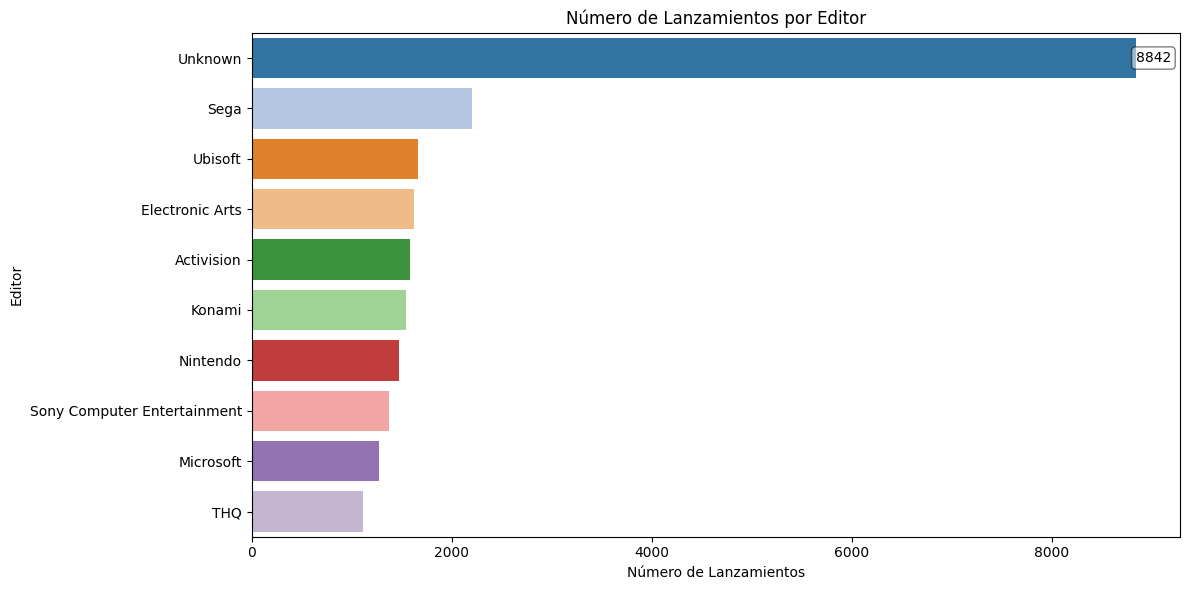

<ipython-input-14-c3c83f1d18e0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)


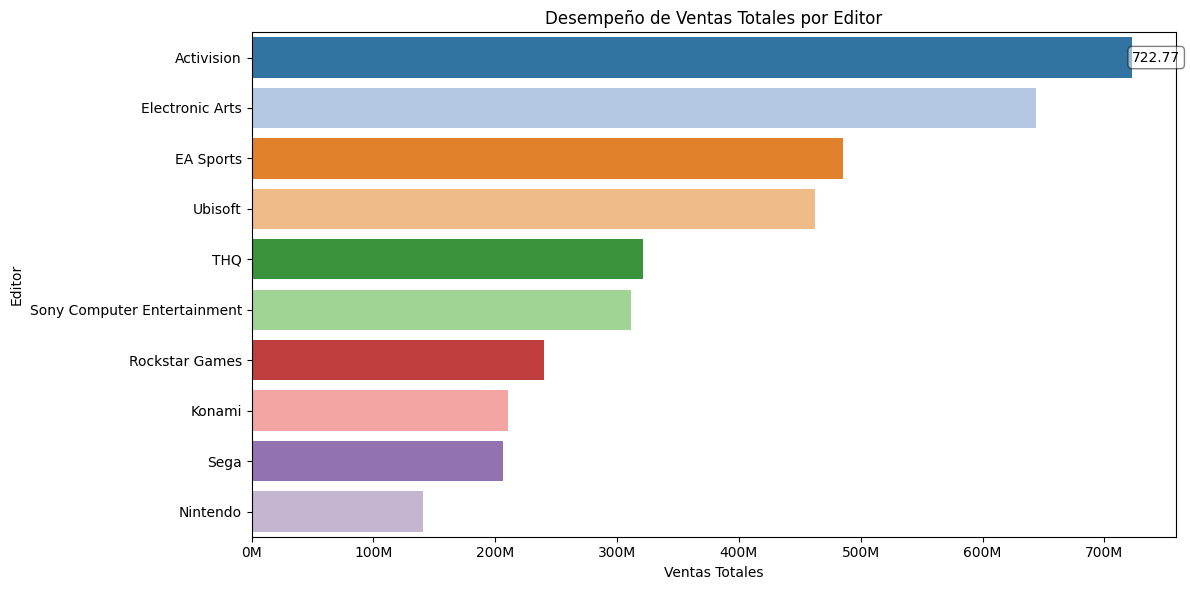

In [14]:
# Agrupar por editor y calcular el número de lanzamientos y la suma de ventas totales por editor
publisher_stats = df.groupby('publisher').agg({
    'title': 'count',
    'total_sales': 'sum'
}).reset_index()

# Ordenar los editores por número de lanzamientos
sorted_publishers_by_num = publisher_stats.sort_values(by='title', ascending=False).head(10)
sorted_publishers_by_sales = publisher_stats.sort_values(by='total_sales', ascending=False).head(10)

# Paleta de colores basada en la cantidad de géneros ordenados por puntuación del crítico
palette = sns.color_palette("tab20", len(sorted_publishers_by_num))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num, palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.title('Número de Lanzamientos por Editor')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Editor')
plt.tight_layout()
plt.show()

# Gráfico de desempeño de ventas por editor
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Desempeño de Ventas Totales por Editor')
plt.xlabel('Ventas Totales')
plt.ylabel('Editor')
plt.tight_layout()
plt.show()


# **3.2 Comparar las ventas entre diferentes editores**
En este fragmento de código, se lleva a cabo un análisis sobre las ventas totales de los editores de videojuegos presentes en el conjunto de datos:

1. **Agrupación y Suma de Ventas por Editor**:
   - Se agrupa el DataFrame por editor y se calcula la suma de las ventas totales para cada editor.
   - Se ordenan los editores por la suma de las ventas totales en orden descendente.
   - Se seleccionan los 150 principales editores en función de sus ventas totales acumuladas.

2. **Gráfico de Puntos de Ventas Totales por Editor**:
   - Se utiliza un gráfico de puntos para representar las ventas totales de cada editor.
   - Cada punto en el gráfico representa un editor, y su posición en el eje y corresponde al nombre del editor, mientras que su posición en el eje x representa las ventas totales acumuladas.
   - Se utiliza una paleta de colores suaves ('muted') para mejorar la legibilidad del gráfico.
   - El eje x está formateado para mostrar las ventas en millones.

Este gráfico ofrece una visualización clara de las ventas totales por editor, lo que permite identificar rápidamente los principales contribuyentes al total de ventas en la industria de los videojuegos.


<ipython-input-15-78c8b3cb1b9c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.pointplot(x='total_sales', y='publisher', data=editores_ordenados, join=False, palette='muted')
<ipython-input-15-78c8b3cb1b9c>:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x='total_sales', y='publisher', data=editores_ordenados, join=False, palette='muted')


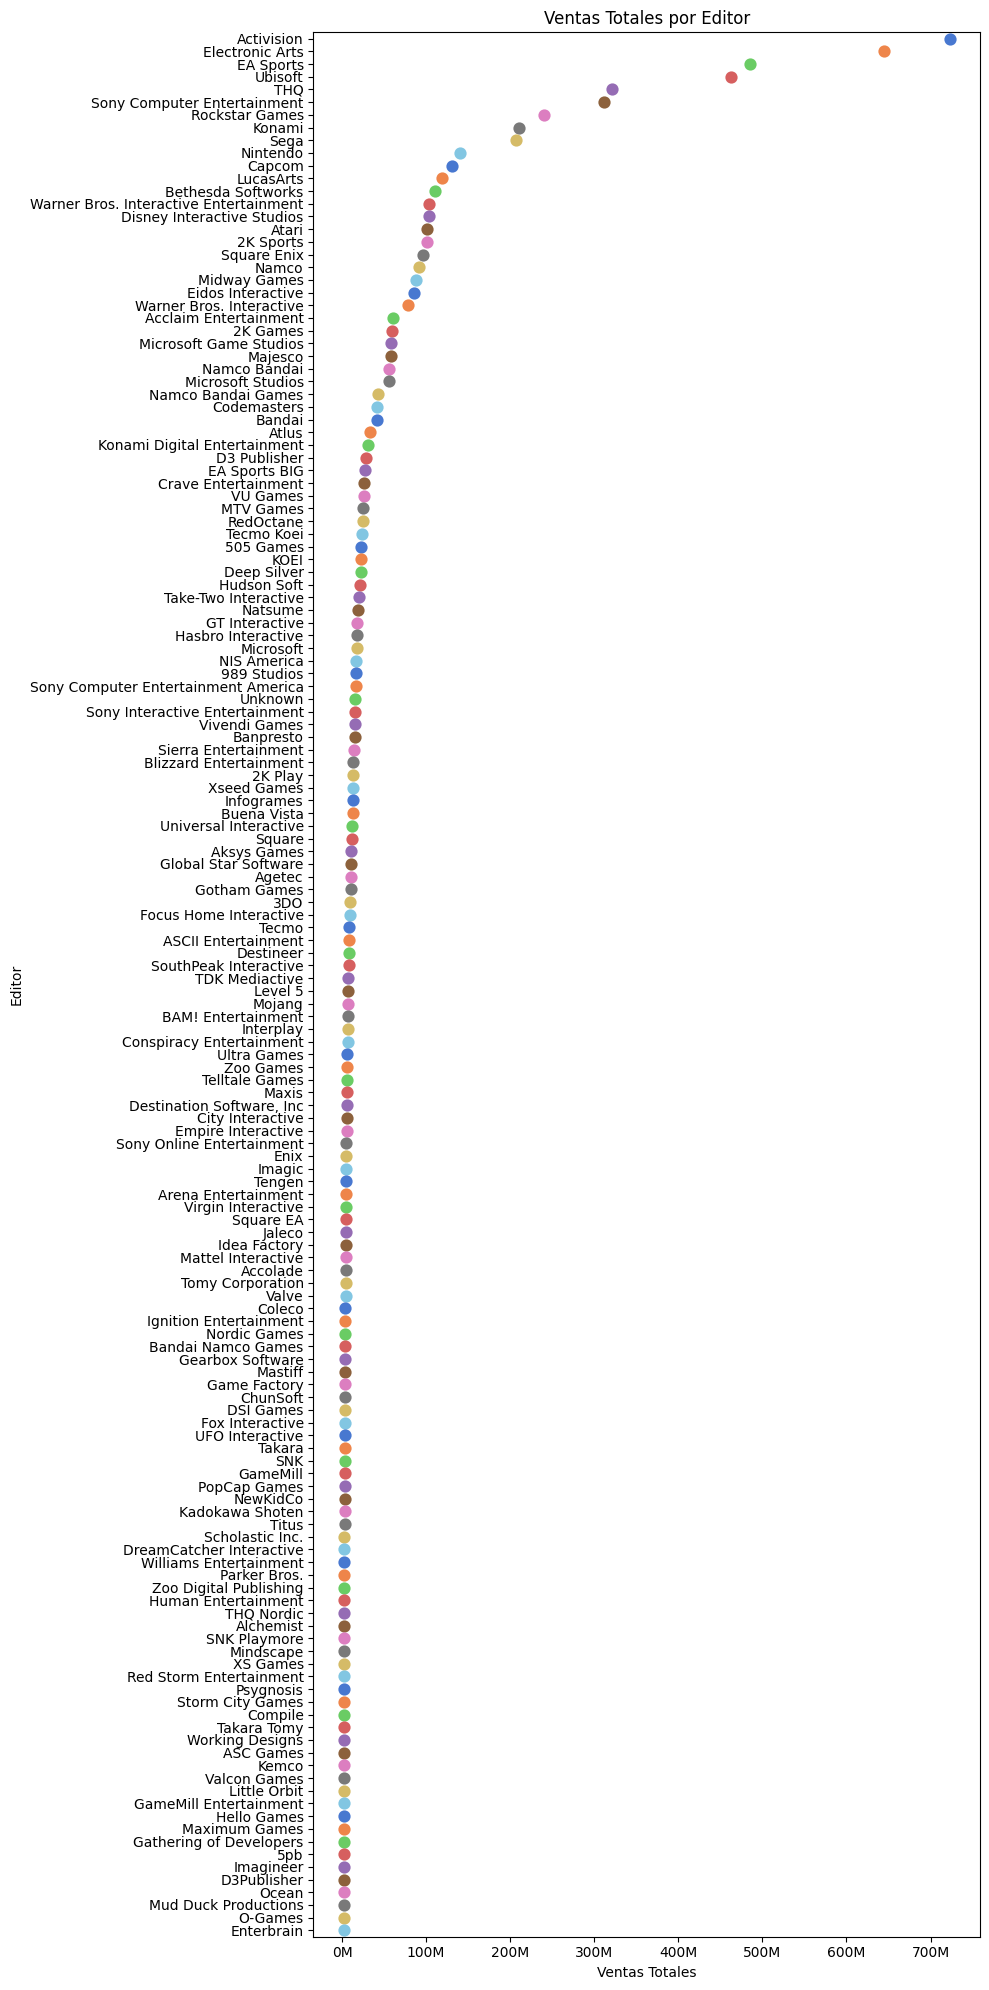

In [15]:
# Agrupar por editor y calcular las ventas totales por editor
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index()

# Ordenar los editores por ventas totales
editores_ordenados = publisher_sales.sort_values(by='total_sales', ascending=False).head(150)

# Gráfico de ventas totales por editor utilizando un gráfico de puntos
plt.figure(figsize=(10, 20))
ax = sns.pointplot(x='total_sales', y='publisher', data=editores_ordenados, join=False, palette='muted')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.xlabel('Ventas Totales')
plt.ylabel('Editor')
plt.title('Ventas Totales por Editor')
plt.tight_layout()
plt.show()


# **4.1 Analizar preferencias de genero por regiones**
En este fragmento de código, se realiza un análisis de las ventas totales de videojuegos por género y región, seguido de la visualización de estos datos mediante un mapa de calor:

1. **Agrupación y Cálculo de Ventas Totales por Género y Región**:
   - Se agrupa el DataFrame por género y se calcula la suma de las ventas totales para cada región (América del Norte, Japón, PAL y Otras regiones).
   - Se crea un DataFrame que contiene las ventas totales por género y región.

2. **Normalización de los Datos de Ventas**:
   - Se normalizan los datos de ventas para expresarlos como porcentajes del total de ventas en cada género. Esto permite comparar las preferencias de género en distintas regiones de manera más equitativa.

3. **Mapa de Calor**:
   - Se utiliza un mapa de calor para visualizar los porcentajes de ventas de cada género en distintas regiones.
   - Los colores en el mapa de calor representan el porcentaje de ventas de cada género en relación con el total de ventas en la región correspondiente.
   - Se incluyen anotaciones en cada celda del mapa de calor para mostrar los porcentajes de ventas con un solo decimal.
   - Se agregan etiquetas adecuadas a los ejes x e y para indicar las regiones y los géneros respectivamente.
   
Este mapa de calor proporciona una representación visual efectiva de las preferencias de género en distintas regiones, lo que facilita la identificación de tendencias y patrones en el mercado de videojuegos.

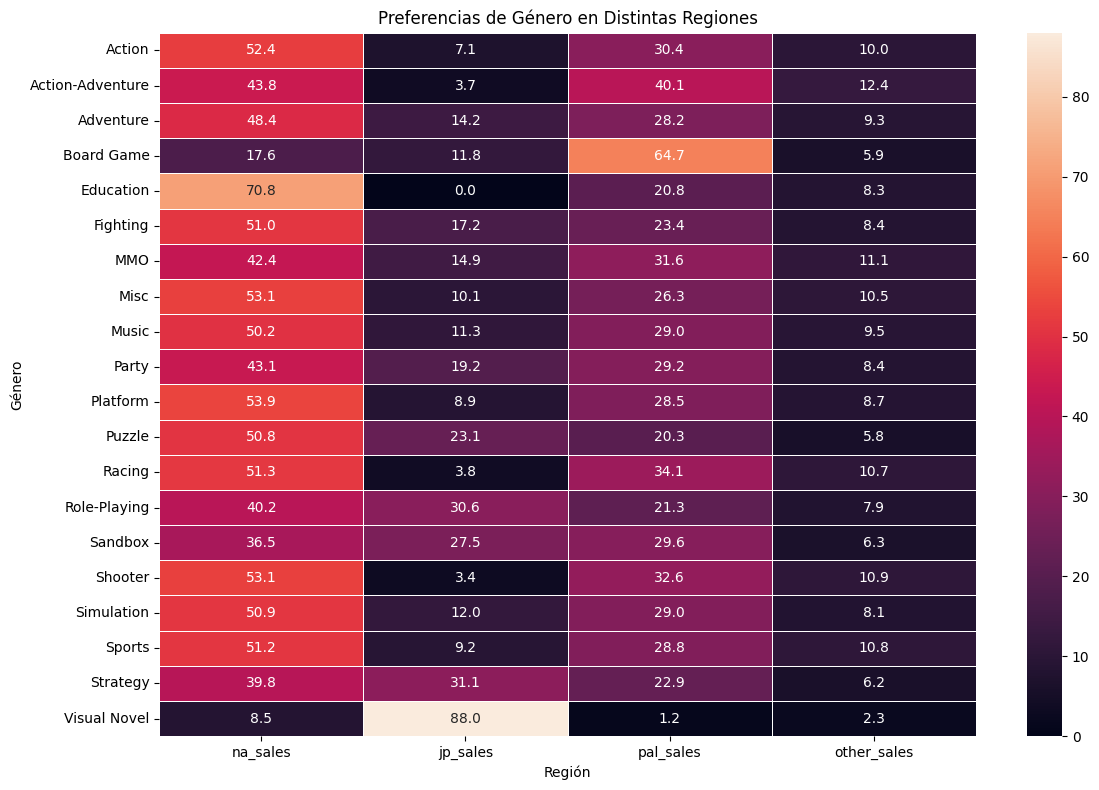

In [16]:
# Agrupar por género y calcular las ventas totales por región
genre_sales = df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Normalizar los datos de ventas para obtener porcentajes
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Preferencias de Género en Distintas Regiones')
plt.xlabel('Región')
plt.ylabel('Género')
plt.tight_layout()
plt.show()


# **4.2 Examine la distribución de ventas en las regiones de América del Norte, Japón y PAL**

El código selecciona las columnas relevantes del DataFrame, que incluyen el género del juego y las ventas en las regiones de América del Norte, Japón y PAL. Luego, transforma el DataFrame a un formato largo para facilitar la representación gráfica. Finalmente, grafica un gráfico de barras agrupado que muestra la distribución de ventas por género en las regiones mencionadas.


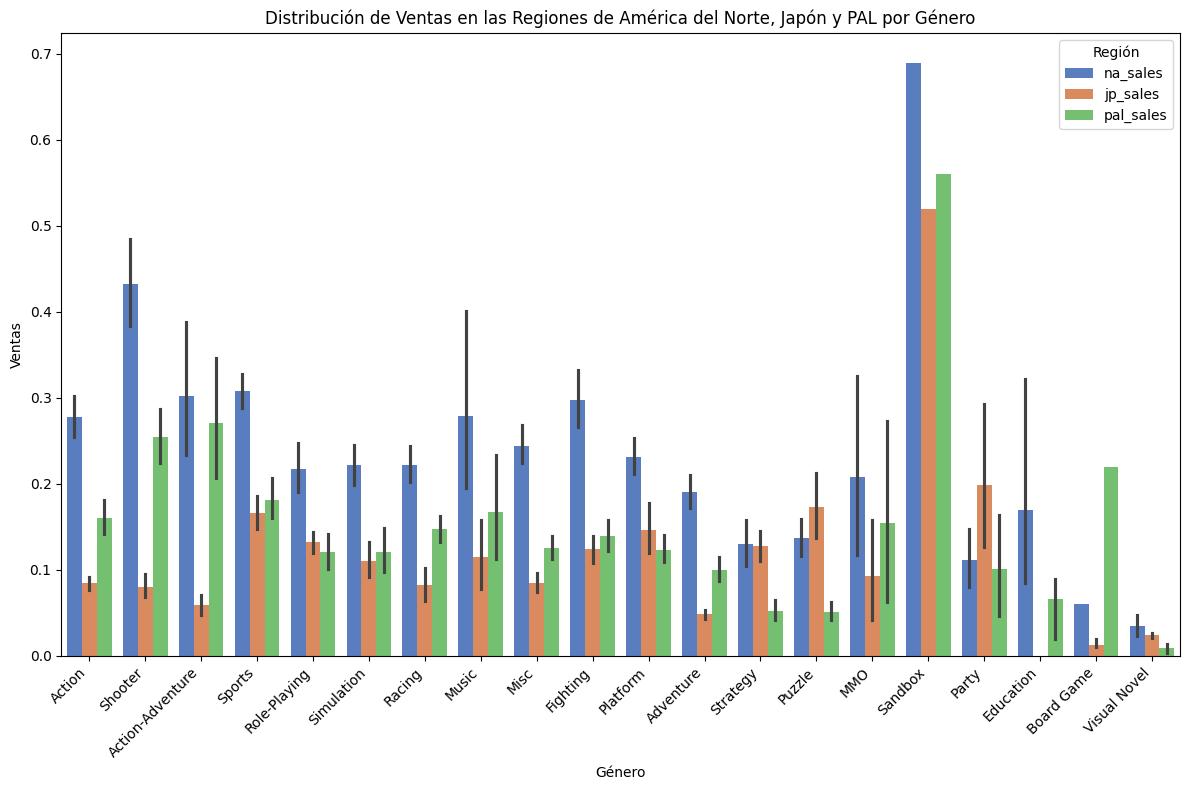

In [17]:
# Seleccionar las columnas de interés: género y ventas por región
sales_data = df[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

# Convertir el DataFrame a un formato largo para facilitar la representación gráfica
sales_data_melted = sales_data.melt(id_vars='genre', var_name='region', value_name='ventas')

# Graficar el gráfico de barras agrupado
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data_melted, x='genre', y='ventas', hue='region', palette='muted')
plt.title('Distribución de Ventas en las Regiones de América del Norte, Japón y PAL por Género')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región', loc='upper right')
plt.tight_layout()
plt.show()


# **5.1 Comparamos las tendencias de ventas entre plataformas nuevas y antiguas**
El código establece un umbral de año de lanzamiento como 2010. Luego, convierte la columna 'release_date' a formato datetime y crea una nueva columna llamada 'platform_category' que categoriza las plataformas como 'Antiguas' o 'Nuevas' según el año de lanzamiento. Posteriormente, agrupa los datos por categoría de plataforma y año de lanzamiento, calculando las ventas totales en cada caso. Finalmente, grafica las tendencias de ventas entre plataformas antiguas y nuevas a lo largo del tiempo.

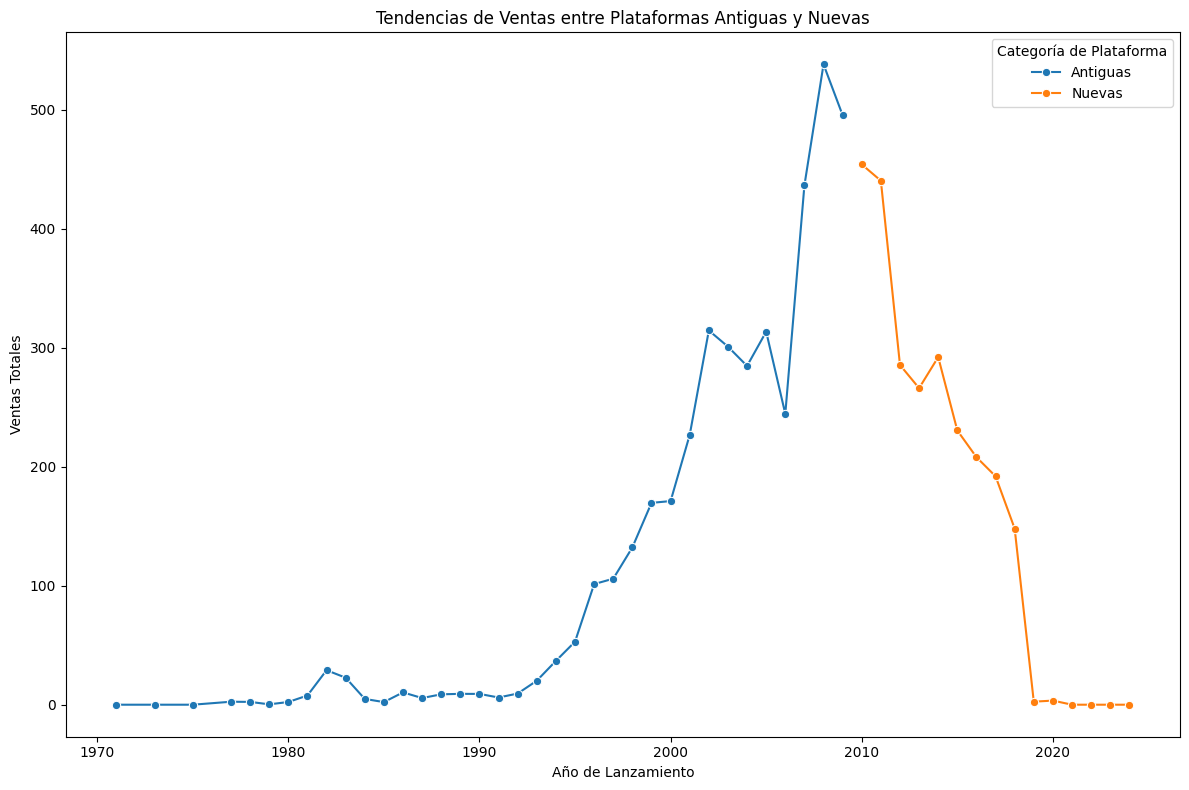

In [18]:
# Establecer el umbral del año de lanzamiento
threshold_release_year = 2010

# Convertir la columna 'release_date' a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Crear una nueva columna para categorizar las plataformas como 'Antiguas' o 'Nuevas' según el año de lanzamiento
df['platform_category'] = np.where(df['release_date'].dt.year < threshold_release_year, 'Antiguas', 'Nuevas')

# Agrupar por categoría de plataforma y año de lanzamiento, y calcular las ventas totales
sales_trends = df.groupby(['platform_category', df['release_date'].dt.year])['total_sales'].sum().reset_index()

# Graficar las tendencias de ventas entre plataformas antiguas y nuevas
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_trends, x='release_date', y='total_sales', hue='platform_category', marker='o')
plt.title('Tendencias de Ventas entre Plataformas Antiguas y Nuevas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría de Plataforma')
plt.tight_layout()
plt.show()


# **5.2 Plataformas con mayor promedio de ventas por juego**
El código calcula el promedio de ventas por juego para cada plataforma, agrupando los datos por la columna 'console' y calculando la media de las ventas totales. Luego, grafica un gráfico de barras donde el eje x representa el promedio de ventas por juego y el eje y representa las diferentes plataformas. Este gráfico proporciona una visualización de las plataformas ordenadas por su promedio de ventas por juego.


<ipython-input-43-58b2e4c06066>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index, palette='viridis')


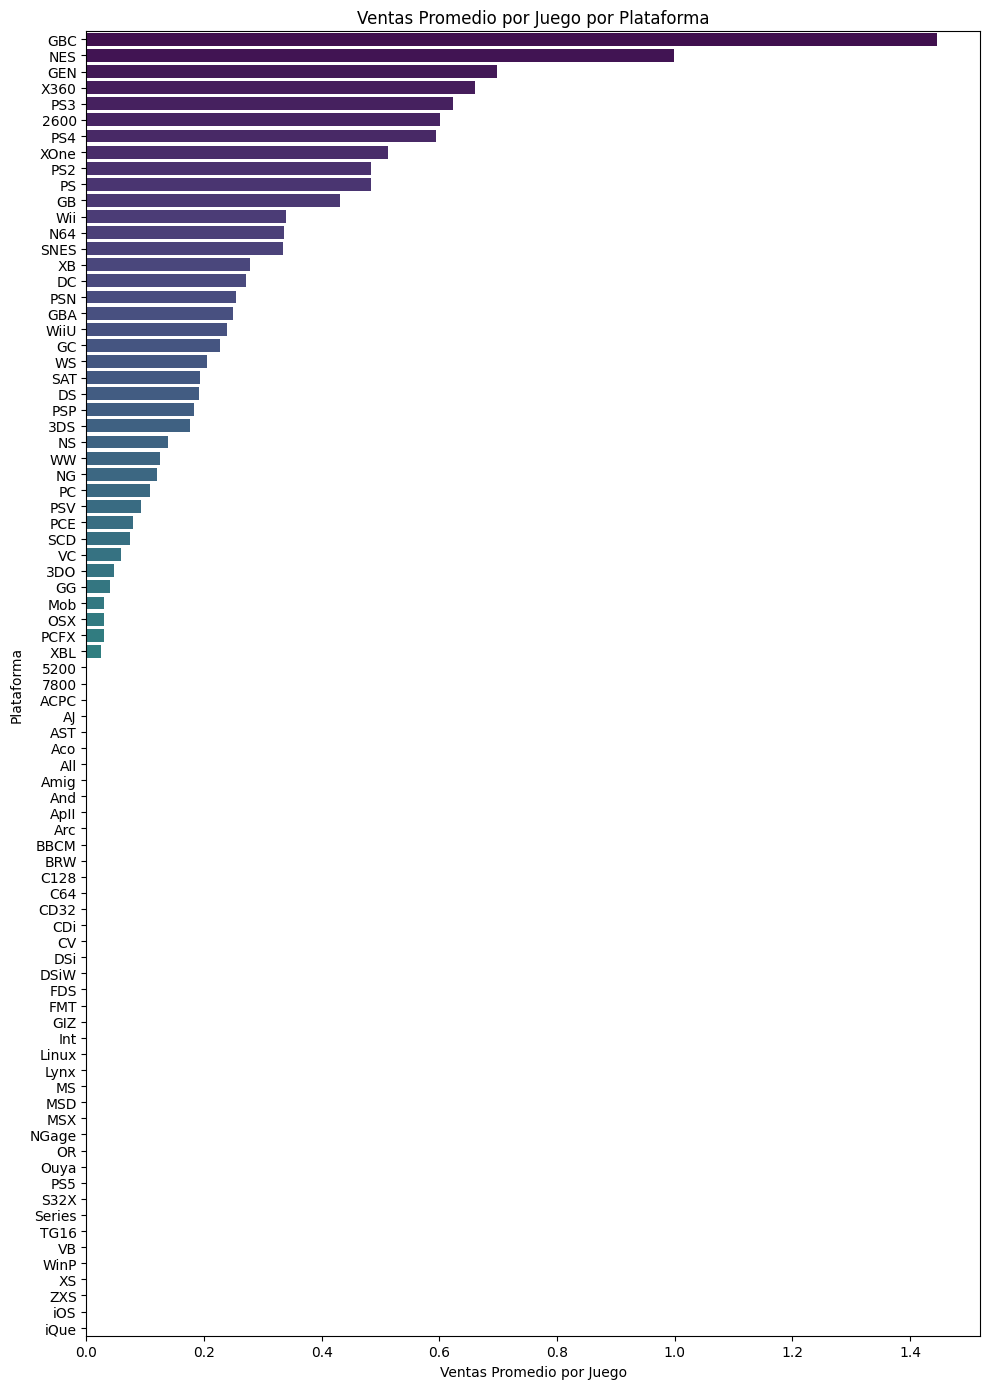

In [ ]:
# Calcular el promedio de ventas por juego por plataforma
average_sales_per_game = df.groupby('console')['total_sales'].mean().sort_values(ascending=False)


# Graficar el gráfico de barras
plt.figure(figsize=(10, 14))
sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index, palette='viridis')
plt.xlabel('Ventas Promedio por Juego')
plt.ylabel('Plataforma')
plt.title('Ventas Promedio por Juego por Plataforma')
plt.tight_layout()
plt.show()


# **6. Impacto de la fecha de lanzamiento**

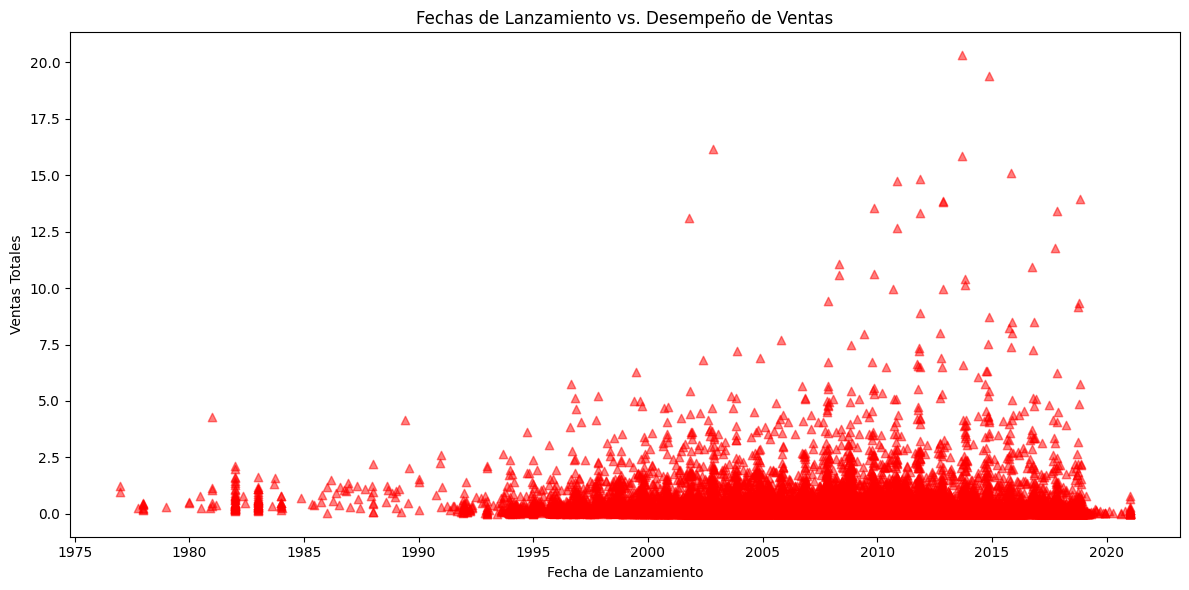

In [ ]:
# Convertir la columna 'release_date' a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Graficar el diagrama de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df['release_date'], df['total_sales'], alpha=0.5, c='r', marker='^')
plt.title('Fechas de Lanzamiento vs. Desempeño de Ventas')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.tight_layout()
plt.show()


# **7. Influencia de los deasarrolladores**

<ipython-input-46-43d74b070640>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


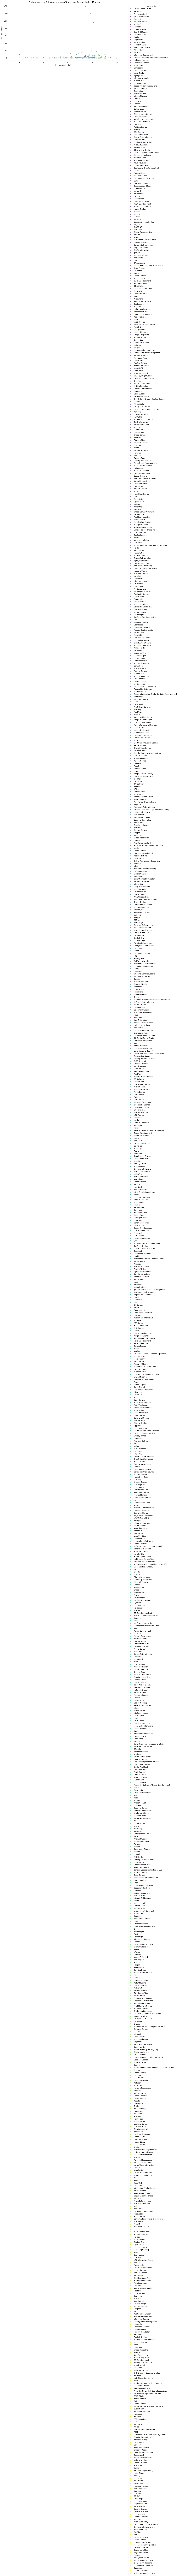

In [ ]:
# Calcular las estadísticas de los desarrolladores
developer_stats = df.groupby('developer').agg({'critic_score': 'mean', 'total_sales': 'sum'}).reset_index()

# Seleccionar una muestra aleatoria de desarrolladores para visualizar
developer_stats_sample = developer_stats.sample(n=1000, random_state=42)

# Graficar el diagrama de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=developer_stats_sample, x='critic_score', y='total_sales', hue='developer', palette='viridis', alpha=0.7)
plt.title('Puntuaciones de Críticos vs. Ventas Totales por Desarrollador (Muestra)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales')
plt.legend(title='Desarrollador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


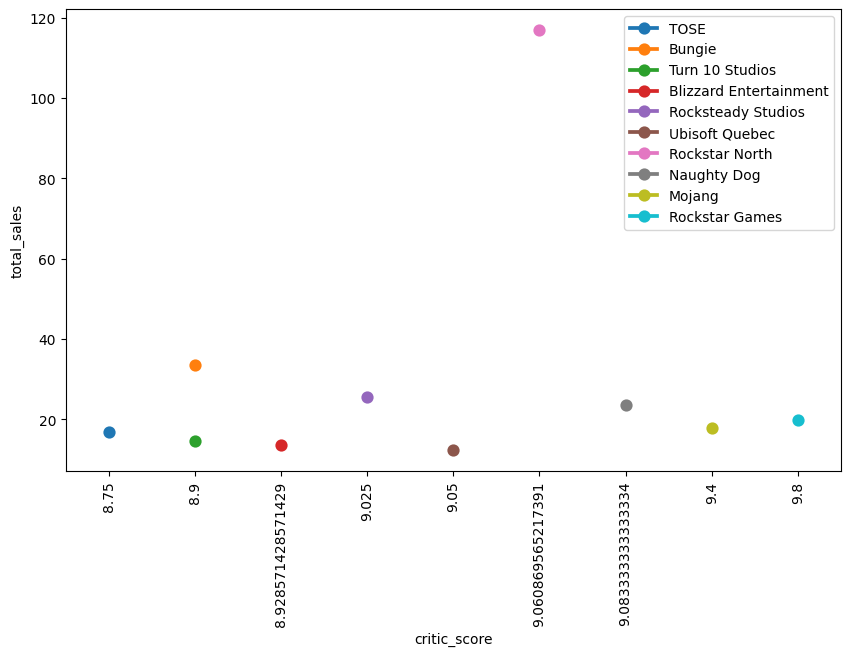

In [ ]:
# Ordenar los desarrolladores por puntuación de críticos de forma descendente y luego por ventas totales de forma descendente
top_10_critic_score = developer_stats.sort_values(by=['critic_score', 'total_sales'], kind='quicksort', ascending=[False, False])

# Filtrar los desarrolladores con al menos 10 ventas totales y seleccionar los 10 primeros
filtered_stats = top_10_critic_score[top_10_critic_score['total_sales'] >= 10].head(10)

# Mostrar los resultados filtrados
filtered_stats


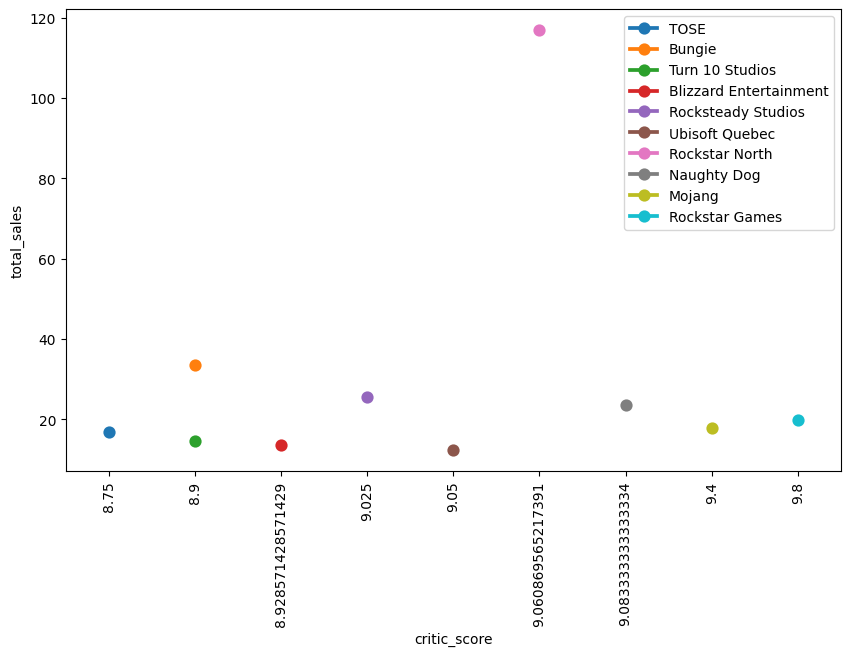

In [ ]:
# Graficar el punto de datos para cada desarrollador
plt.figure(figsize=(10, 6))
sns.pointplot(x='critic_score', y='total_sales', hue='developer', data=filtered_stats)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()


# **8. Longevidad de las ventas**

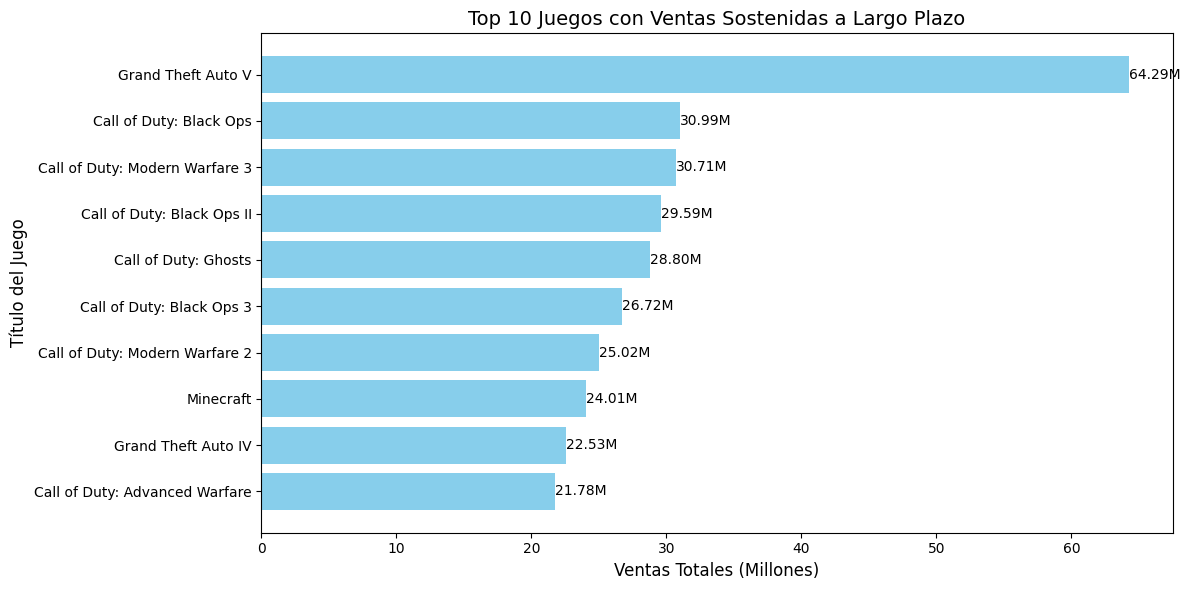

In [ ]:
# Convertir la columna 'release_date' a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Definir el período de largo plazo como 2 años
long_term_period = pd.DateOffset(years=2)

# Calcular la fecha de finalización del período de largo plazo
df['long_term_end_date'] = df['release_date'] + long_term_period

# Filtrar las ventas que ocurrieron dentro del período de largo plazo
long_term_sales = df[df['release_date'] <= df['long_term_end_date']]

# Calcular las ventas totales agregadas por título
long_term_sales_agg = long_term_sales.groupby('title')['total_sales'].sum().reset_index()

# Ordenar los títulos por ventas totales en orden descendente
long_term_sales_agg = long_term_sales_agg.sort_values(by='total_sales', ascending=False)

# Graficar las barras horizontales de los 10 mejores juegos con ventas a largo plazo
plt.figure(figsize=(12, 6))
top_n = 10
plt.barh(long_term_sales_agg['title'].head(top_n), long_term_sales_agg['total_sales'].head(top_n), color='skyblue')
plt.xlabel('Ventas Totales (Millones)', fontsize=12)
plt.ylabel('Título del Juego', fontsize=12)
plt.title(f'Top {top_n} Juegos con Ventas Sostenidas a Largo Plazo', fontsize=14)
plt.gca().invert_yaxis()

# Mostrar los valores de ventas en las barras
for index, value in enumerate(long_term_sales_agg['total_sales'].head(top_n)):
    plt.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# **9. Efecto de la critica**

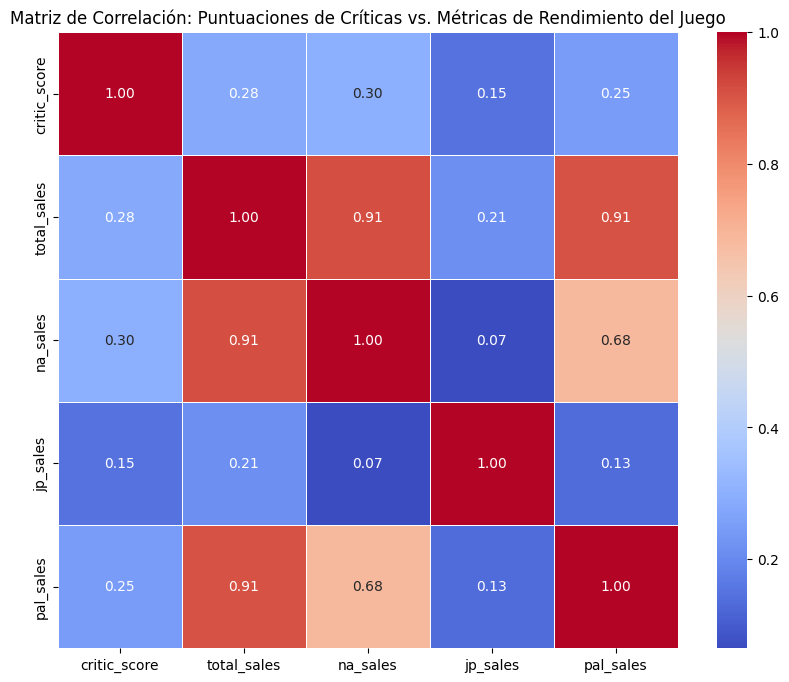

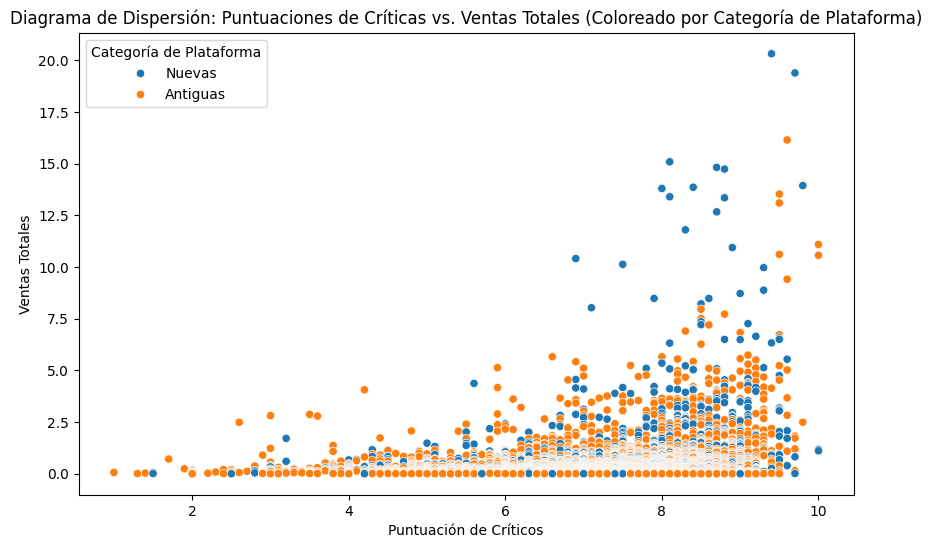

In [ ]:
# Convertir las columnas 'release_date' y 'last_update' a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

# Calcular la matriz de correlación entre las variables de interés
correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].corr()

# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación: Puntuaciones de Críticas vs. Métricas de Rendimiento del Juego')
plt.show()

# Graficar el diagrama de dispersión entre las puntuaciones de críticos y las ventas totales, coloreado por categoría de plataforma
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critic_score', y='total_sales', hue='platform_category')
plt.title('Diagrama de Dispersión: Puntuaciones de Críticas vs. Ventas Totales (Coloreado por Categoría de Plataforma)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría de Plataforma')
plt.show()


In [57]:
print(X.columns)


Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update', 'platform_category'],
      dtype='object')


In [58]:
# Seleccionar 'critic_score' como la variable objetivo
y = df['critic_score']


In [60]:
# Eliminar filas con valores nulos en la columna critic_score
df_cleaned = df.dropna(subset=['critic_score'])

# Verificar la nueva forma del DataFrame
print("Número de filas y columnas del DataFrame después de eliminar filas con valores nulos en critic_score:", df_cleaned.shape)


Número de filas y columnas del DataFrame después de eliminar filas con valores nulos en critic_score: (6678, 14)


In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Eliminar filas con valores nulos en critic_score
df_cleaned = df.dropna(subset=['critic_score'])

# Dividir datos en características y variable objetivo
X = df_cleaned.drop('critic_score', axis=1)  # características
y = df_cleaned['critic_score']  # variable objetivo

# Definir las columnas categóricas y numéricas
categorical_cols = ['title', 'console', 'genre', 'publisher', 'developer']
numeric_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Construir preprocesador para manejar diferentes tipos de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # manejar valores faltantes
    ('scaler', StandardScaler())  # normalizar datos
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # codificar variables categóricas
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Definir modelos
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Machine', SVR())
]

# Comparar modelos utilizando validación cruzada
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    cv_scores = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Modelo: {name}, MSE medio: {cv_scores.mean()}, Desviación estándar del MSE: {cv_scores.std()}")


Modelo: Linear Regression, MSE medio: 2.8937170982983, Desviación estándar del MSE: 0.8796091730353987
Modelo: Random Forest, MSE medio: 1.9007024998212558, Desviación estándar del MSE: 0.3439720027231825
Modelo: Support Vector Machine, MSE medio: 1.7833082683505594, Desviación estándar del MSE: 0.2838029513680059


Basándonos en los resultados obtenidos al comparar los modelos de regresión lineal, Random Forest y Support Vector Machine utilizando el error cuadrático medio (MSE) como métrica de evaluación, podemos sacar algunas conclusiones:

1. Desempeño del modelo: El modelo de regresión lineal tiene el MSE más alto, seguido por el modelo Random Forest y luego el modelo de Support Vector Machine. Esto sugiere que, en promedio, el modelo de regresión lineal tiene un desempeño ligeramente inferior en comparación con los otros dos modelos en términos de cuán cerca están las predicciones del modelo de los valores reales.

2. Varianza del error: La desviación estándar del MSE proporciona información sobre la variabilidad del error en las predicciones. En este caso, el modelo de regresión lineal tiene la desviación estándar más alta, lo que indica una mayor variabilidad en el error en comparación con los otros dos modelos. Por otro lado, el modelo de Support Vector Machine tiene la desviación estándar más baja, lo que sugiere una menor variabilidad en el error.

3. Selección del modelo: Aunque el modelo de regresión lineal tiene el MSE más alto, esto no necesariamente significa que sea el peor modelo en todas las situaciones. La elección del modelo adecuado depende de varios factores, como la naturaleza de los datos, la complejidad del problema y las características específicas del dominio.

En cuanto a cómo esto satisface la solución del problema planteado, estos resultados proporcionan información valiosa sobre el rendimiento relativo de diferentes modelos de regresión en la predicción del puntaje de los críticos de los videojuegos. Esto puede ayudar a los desarrolladores y editores de videojuegos a seleccionar el modelo más apropiado para predecir la recepción crítica de los juegos y tomar decisiones estratégicas informadas en el desarrollo y lanzamiento de nuevos productos.